# Convolutional Neural Networsk Project

## Sub-project 1:

## Solve Fashion_MNIST with LeNet architecture

In this project you will implement the LeNet architecture of Convolutional Neural Networks. First you will download the Fashion-MNIST dataset. Split into train/validation/test datasets and train the network. Finally, plot the learning curves (train/validation loss and accuracy) and show the confusion matrix.

### 1. Download Fashion-MNIST

In [1]:
import os # processing file path
import gzip # unzip the .gz file, not used here
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import requests
dataset_urls = {
    "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz",
    "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz",
    "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz",
    "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz"
}

input_dir = os.path.join("input")
if not os.path.exists(input_dir):
    os.mkdir(input_dir)

for url in dataset_urls:
    r = requests.get(url)
    fname = ''
    if "Content-Disposition" in r.headers.keys():
        fname = requests.findall("filename=(.+)", r.headers["Content-Disposition"])[0]
    else:
        fname = url.split("/")[-1]
        fname = os.path.join(input_dir, fname)
    if os.path.isfile(fname):
        continue
    with open(fname, 'wb') as f:
        f.write(r.content)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print("Here are the input datasets: ")
print(check_output(["ls", "./input"]).decode("utf8"))

print("Python Version: ")
!python -V
# Any results you write to the current directory are saved as output.

Here are the input datasets: 
t10k-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz
train-images-idx3-ubyte.gz
train-labels-idx1-ubyte.gz

Python Version: 
Python 3.8.8


### 2. Split the data into train / validation / test subsets. Make mini-batches, if necesssary.

In [43]:
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [41]:
try:
    del X_train, y_train
    del X_val, y_val
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    print('Nothing to clean.')
    pass

Nothing to clean.


In [46]:
# Load the data
X_train, y_train = load_mnist('./input', kind='train')
X_test, y_test = load_mnist('./input', kind='t10k')
m_train = X_train.shape[0]
m_test = X_test.shape[0]
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)
Number of training examples: m_train = 60000
Number of testing examples: m_test = 10000


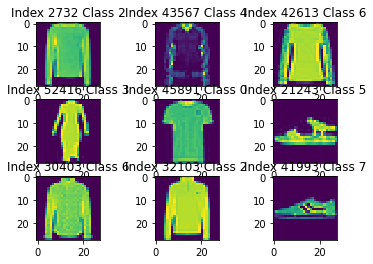

In [47]:
print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
np.random.seed(0);
indices = list(np.random.randint(m_train,size=9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[indices[i]].reshape(28,28), interpolation='none')
    plt.title("Index {} Class {}".format(indices[i], y_train[indices[i]]))

In [48]:
# Split the data into train / validation / test
m_train = 59000
m_validation = 1000
X_train, X_val = X_train[:m_train, ...], X_train[m_train:, ...]
y_train, y_val = y_train[:m_train, ...], y_train[m_train:, ...]

In [49]:
# Normalize
X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [50]:
import tensorflow as tf
X_train = tf.expand_dims(X_train.reshape(-1, 28, 28), 3)
X_val = tf.expand_dims(X_val.reshape(-1, 28, 28), 3)
X_test = tf.expand_dims(X_test.reshape(-1, 28, 28), 3)

In [51]:
# Test if the shapes are correct and the values make sense
print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_val shape: " + str(X_val.shape))
print("y_val shape: " + str(y_val.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of validation examples: m_validation = " + str(m_validation))
print ("Number of testing examples: m_test = " + str(m_test))
print("Feature Values: \nFrom " + str(np.min(X_train)) + " to " + str(np.max(X_train)))
print("Test Feature Values: \nFrom " + str(np.min(X_test)) + " to " + str(np.max(X_test)))
print("Data type: " + str(X_train.dtype))
print("\nLabel Values: ")
print(set(list(y_train)))
print("Data type: " + str(y_train.dtype))

X_train shape: (59000, 28, 28, 1)
y_train shape: (59000,)
X_val shape: (1000, 28, 28, 1)
y_val shape: (1000,)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)
Number of training examples: m_train = 59000
Number of validation examples: m_validation = 1000
Number of testing examples: m_test = 10000
Feature Values: 
From 0.0 to 1.0
Test Feature Values: 
From 0.0 to 1.0
Data type: <dtype: 'float32'>

Label Values: 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Data type: uint8


### 3. Build the LeNet model

In [52]:
lenet = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 6, kernel_size = 5, strides = 1, padding='same', activation='tanh', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = 5, strides = 1, padding='valid', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size = 2, strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation = 'tanh'),
    tf.keras.layers.Dense(84, activation = 'tanh'),
    tf.keras.layers.Dense(10,  activation = 'softmax')
])

In [53]:
lenet.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
lenet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

### 4. Train the model on the dataset

In [54]:
history = lenet.fit(X_train, y_train, epochs=20, batch_size=500, validation_data=(X_val, y_val), verbose=2)
print('Training done!')

Epoch 1/20
118/118 - 2s - loss: 0.7680 - accuracy: 0.7342 - val_loss: 0.4905 - val_accuracy: 0.8060
Epoch 2/20
118/118 - 1s - loss: 0.4359 - accuracy: 0.8441 - val_loss: 0.4049 - val_accuracy: 0.8510
Epoch 3/20
118/118 - 1s - loss: 0.3762 - accuracy: 0.8652 - val_loss: 0.3536 - val_accuracy: 0.8730
Epoch 4/20
118/118 - 1s - loss: 0.3446 - accuracy: 0.8751 - val_loss: 0.3395 - val_accuracy: 0.8690
Epoch 5/20
118/118 - 1s - loss: 0.3244 - accuracy: 0.8835 - val_loss: 0.3195 - val_accuracy: 0.8860
Epoch 6/20
118/118 - 1s - loss: 0.3058 - accuracy: 0.8888 - val_loss: 0.3011 - val_accuracy: 0.8940
Epoch 7/20
118/118 - 1s - loss: 0.2939 - accuracy: 0.8927 - val_loss: 0.3136 - val_accuracy: 0.8680
Epoch 8/20
118/118 - 1s - loss: 0.2802 - accuracy: 0.8973 - val_loss: 0.2886 - val_accuracy: 0.8980
Epoch 9/20
118/118 - 1s - loss: 0.2712 - accuracy: 0.9010 - val_loss: 0.2846 - val_accuracy: 0.9040
Epoch 10/20
118/118 - 1s - loss: 0.2612 - accuracy: 0.9048 - val_loss: 0.2802 - val_accuracy: 0.8960

### 5. Plot the training curves (Loss and accuracy)

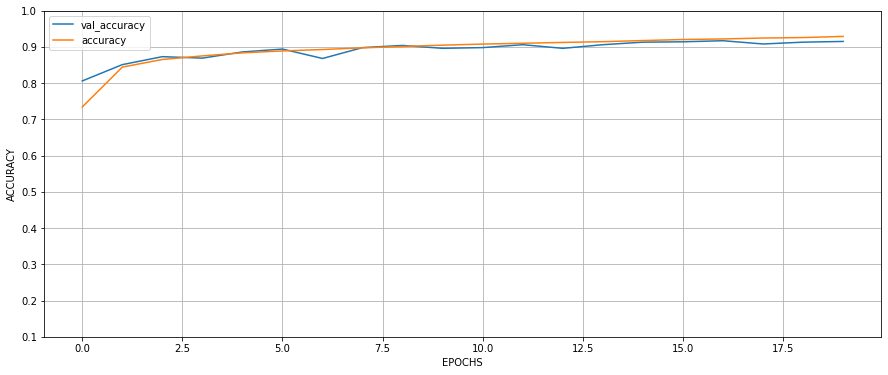

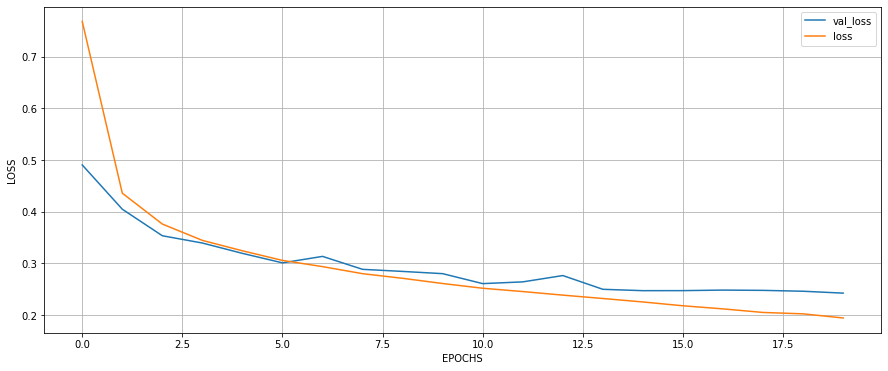

In [55]:
def plot_stuff(history):
    val_acc = history.history['val_accuracy']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    loss = history.history['loss']

    fig = plt.figure(figsize=(15,6))
    plt.plot(np.arange(len(val_acc)),val_acc,label='val_accuracy')
    plt.plot(np.arange(len(acc)),acc,label='accuracy')
    # since we have 10 classes, 0.1 means the guesses are random, 100% means it's perfectly accurate
    plt.ylim(0.1, 1.0)
    plt.xlabel('EPOCHS')
    plt.ylabel('ACCURACY')
    plt.legend()
    plt.grid()
    plt.show()

    fig = plt.figure(figsize=(15,6))
    plt.plot(np.arange(len(val_loss)),val_loss,label='val_loss')
    plt.plot(np.arange(len(loss)),loss,label='loss')
    plt.xlabel('EPOCHS')
    plt.ylabel('LOSS')
    plt.legend()
    plt.grid()
    plt.show()
plot_stuff(history)

### 6. Show the confusion matrix and accuracy on the test dataset.

In [ ]:
lenet.evaluate(X_test, y_test, verbose = 1)
predictions = lenet.predict(X_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2626 - accuracy: 0.9023


Confusion Matrix
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.85      0.84      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.85      0.83      0.84      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.80      0.87      0.84      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.75      0.70      0.72      1000
     Sneaker       0.97      0.95      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



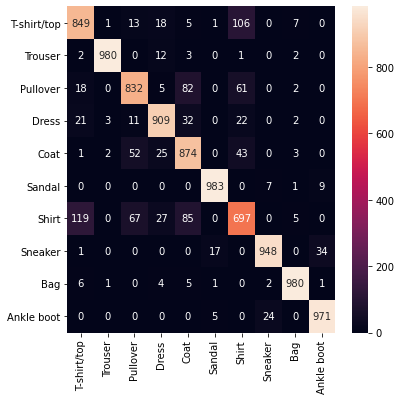

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(predictions, axis=1)
import seaborn as sns
print('Confusion Matrix')
cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (6,6))
sns.heatmap(df_cm, annot=True, fmt=".0f")
print(classification_report(y_true, y_pred, target_names = class_names))

### 7. Is LeNet better than the fully connected Neural Network trained in the project from lecture 3? Comment on the results

Answer: LeNet performs slightly better than the NN used in project 3, by about 1%/2%. The performance would likely be improved by adding dropout layers after each subsampling and after the first fully connected layer for regularization. Another possible improvement would be adding an additional convolutional layer while reducing the kernel size of the filters, to capture more features, although this may impact performance.
As far as the training is concerned, with a batch size of 500 the validation loss stops dropping at around 20 epochs, which I suppose is an ideal amount of epochs to train the CNN. Training for more epochs (e.g.: 50) doesn't seem to yield improvements.

## Sub-project 2:

## Use a pretrained model to solve 

In this project you will download the Intel Image Classification dataset (https://www.kaggle.com/puneet6060/intel-image-classification/download).
Find a suitable pretrained Convolutional Neural Network and its weights. Fix the filters and retrain/finetune the top of the network. Show and comment on resuls.

Alternativelly, you can browse Kaggle for some funny datasets like: Dogs vs Cats, Alien vs Predator, Doom vs Animal Crossing, CelebA, etc. Just don't use something easy like MNIST, Fashion-MNIST, etc.

### 1. Download the data

In [1]:
%env KAGGLE_USERNAME=knowbot
%env KAGGLE_KEY=660c2c87511a41f5ebcdca0d6384754e
!kaggle datasets download slothkong/10-monkey-species -p ./datasets/monkeys --unzip

env: KAGGLE_USERNAME=knowbot
env: KAGGLE_KEY=660c2c87511a41f5ebcdca0d6384754e




  0%|          | 0.00/547M [00:00<?, ?B/s]
  0%|          | 1.00M/547M [00:00<01:16, 7.48MB/s]
  1%|          | 3.00M/547M [00:00<00:52, 10.9MB/s]
  1%|          | 5.00M/547M [00:00<00:46, 12.4MB/s]
  1%|1         | 7.00M/547M [00:00<00:48, 11.6MB/s]
  2%|1         | 9.00M/547M [00:00<00:45, 12.3MB/s]
  2%|2         | 11.0M/547M [00:00<00:44, 12.8MB/s]
  2%|2         | 13.0M/547M [00:01<00:42, 13.2MB/s]
  3%|2         | 15.0M/547M [00:01<00:42, 13.2MB/s]
  3%|3         | 17.0M/547M [00:01<00:42, 13.2MB/s]
  3%|3         | 19.0M/547M [00:01<00:40, 13.5MB/s]
  4%|3         | 21.0M/547M [00:01<00:39, 13.8MB/s]
  4%|4         | 23.0M/547M [00:01<00:40, 13.7MB/s]
  5%|4         | 25.0M/547M [00:02<00:40, 13.6MB/s]
  5%|4         | 27.0M/547M [00:02<00:50, 10.7MB/s]
  5%|5         | 30.0M/547M [00:02<00:41, 13.2MB/s]
  6%|5         | 32.0M/547M [00:02<00:40, 13.4MB/s]
  6%|6         | 34.0M/547M [00:02<00:39, 13.6MB/s]
  7%|6         | 36.0M/547M [00:02<00:38, 13.8MB/s]
  7%|6         | 38.

In [1]:
import os
path = os.path.join("datasets/monkeys")
train_dir = os.path.join(path, "training/training")
val_dir = os.path.join(path, "validation/validation")

In [2]:
import pandas as pd
data_info = pd.read_csv(os.path.join(path, "monkey_labels.txt"), names=['label','species', 'name','train_tot', 'val_tot'], skiprows=1, sep="\s*[,]\s*", engine="python")
data_info

,label,species,name,train_tot,val_tot
0,n0,alouatta_palliata,mantled_howler,131,26
1,n1,erythrocebus_patas,patas_monkey,139,28
2,n2,cacajao_calvus,bald_uakari,137,27
3,n3,macaca_fuscata,japanese_macaque,152,30
4,n4,cebuella_pygmea,pygmy_marmoset,131,26
5,n5,cebus_capucinus,white_headed_capuchin,141,28
6,n6,mico_argentatus,silvery_marmoset,132,26
7,n7,saimiri_sciureus,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [3]:
labels = data_info['name']
labels

0               mantled_howler
1                 patas_monkey
2                  bald_uakari
3             japanese_macaque
4               pygmy_marmoset
5        white_headed_capuchin
6             silvery_marmoset
7       common_squirrel_monkey
8    black_headed_night_monkey
9               nilgiri_langur
Name: name, dtype: object

### 2. Preprocess the data.

(This might include resizing, augmenting, etc.)




In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Found 1097 files belonging to 10 classes.
Found 272 files belonging to 10 classes.


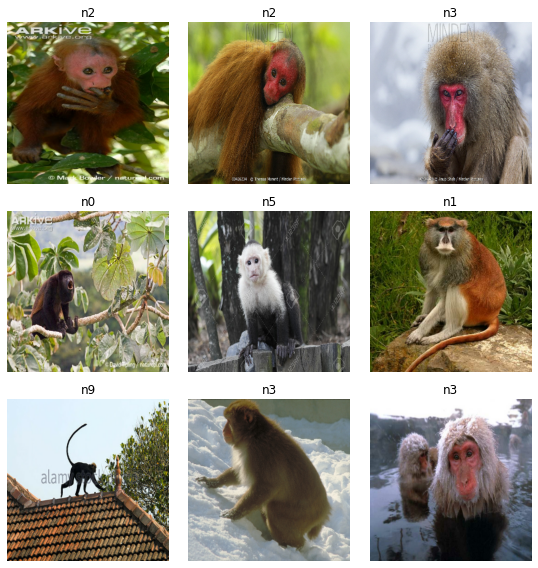

In [5]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

img_size = (299, 299)
batch_size = 32
train_ds = image_dataset_from_directory(
    train_dir,
    shuffle = True,
    image_size = img_size,
    batch_size = batch_size
)

val_ds = image_dataset_from_directory(
    val_dir,
    shuffle = True,
    image_size = img_size,
    batch_size = batch_size
)

classes = train_ds.class_names
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]])
        plt.axis("off")
        plt.tight_layout()

In [6]:
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing as keras_pp
aug_pipeline = keras.Sequential([
    keras_pp.RandomTranslation(0.1, 0.1, fill_mode = 'nearest'),
    keras_pp.RandomFlip('horizontal'),
    keras_pp.RandomZoom(0.2, fill_mode = 'nearest'),
    keras_pp.RandomRotation(0.2, fill_mode = 'nearest')
])

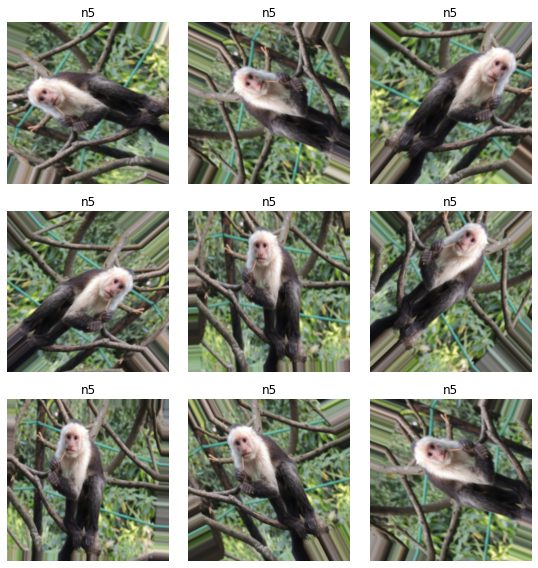

In [7]:
for images, labels in train_ds.take(1):
    plt.figure(figsize = (8, 8))
    img = images[0]
    lb = labels[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = aug_pipeline(tf.expand_dims(img, 0))
        plt.imshow(augmented_image[0] / 255.)
        plt.title(classes[lb])
        plt.axis("off")
        plt.tight_layout()

In [8]:
preprocess = tf.keras.applications.xception.preprocess_input

### 3. Split the data (train / test / validation) and make mini-batches.

In [9]:
from tensorflow.data.experimental import cardinality
ratio = 5 # equivalent
card = cardinality(val_ds)
test_ds = val_ds.take(card // ratio)
val_ds = val_ds.skip(card // ratio)

### 4. Download the pretrained architecture and weights.

This part might include some research and understanding of architecures and the type of data they were trained on.

I opted to use Xception, an architecture introduced in 2017 by Francois Chollet, creator of Keras.

Xception shows really good performance in terms of accuracy while being still "somewhat" contained (about 22 million parameters).

Xception is 71 layers deep and performs depthwise convolutions followed by pointwise convolution - aka, it first looks for correlations in 2D space, and then in 1D space. This is the idea that sets it apart from its predecessor (Inceptionv3) and allows it to outperform it.

I opted to use the default weights trained on imagenet.

reference benchmarks: https://keras.io/api/applications/\

Xception takes as input 3-channel images of size 299x299

In [10]:
in_shape = img_size + (3,)
xception_base = tf.keras.applications.Xception(input_shape = in_shape, include_top = False, weights = 'imagenet')

### 5. Build the larger model that includes the pre-trained part and prepare it for training.

* Show the model summary so you are sure which components are included and how many (un)trainable parameters you have

In [11]:
xception_base.trainable = False
xception_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [12]:
# create other layers
avg_layer = tf.keras.layers.GlobalAveragePooling2D()
dropout_layer = tf.keras.layers.Dropout(0.2)
prediction_layer = tf.keras.layers.Dense(len(classes), activation='softmax')

In [13]:
inputs = tf.keras.Input(shape = in_shape)
# !!! This causes an error with numpy >= 1.20, donwgrade to 1.19 to make it work <3
x = aug_pipeline(inputs)
x = preprocess(x)
x = xception_base(x, training=False)
x = avg_layer(x)
x = dropout_layer(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 299, 299, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 299, 299, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 299, 299, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0     

In [14]:
model.evaluate(test_ds)

1/1 [==============================] - 10s 10s/step - loss: 2.2923 - accuracy: 0.0625


[2.292283535003662, 0.0625]

### 6. Train the trainable part of the model

In [15]:
history = model.fit(train_ds, epochs = 10, validation_data = val_ds)

Epoch 1/10
35/35 [==============================] - 24s 411ms/step - loss: 2.2234 - accuracy: 0.1750 - val_loss: 2.0746 - val_accuracy: 0.4083
Epoch 2/10
35/35 [==============================] - 15s 373ms/step - loss: 1.9680 - accuracy: 0.4859 - val_loss: 1.8367 - val_accuracy: 0.8125
Epoch 3/10
35/35 [==============================] - 15s 369ms/step - loss: 1.7592 - accuracy: 0.7092 - val_loss: 1.6295 - val_accuracy: 0.9125
Epoch 4/10
35/35 [==============================] - 15s 370ms/step - loss: 1.5657 - accuracy: 0.8323 - val_loss: 1.4225 - val_accuracy: 0.9625
Epoch 5/10
35/35 [==============================] - 15s 368ms/step - loss: 1.3920 - accuracy: 0.9052 - val_loss: 1.2677 - val_accuracy: 0.9500
Epoch 6/10
35/35 [==============================] - 15s 369ms/step - loss: 1.2611 - accuracy: 0.8970 - val_loss: 1.1279 - val_accuracy: 0.9583
Epoch 7/10
35/35 [==============================] - 15s 369ms/step - loss: 1.1060 - accuracy: 0.9271 - val_loss: 1.0085 - val_accuracy: 0.9667

### 7. Show the training plots and confusion matrix

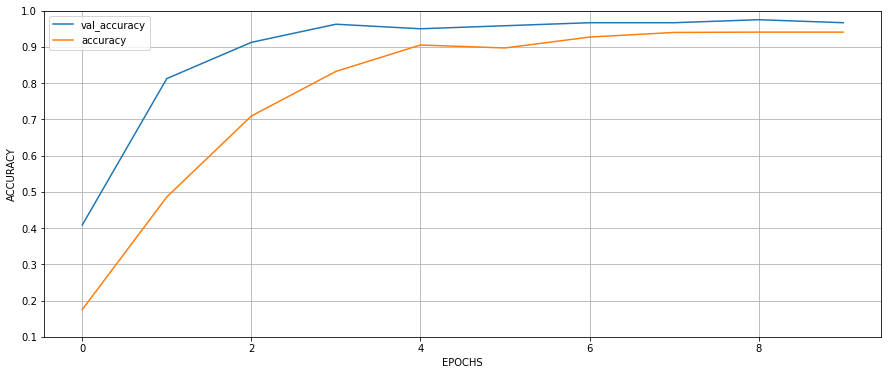

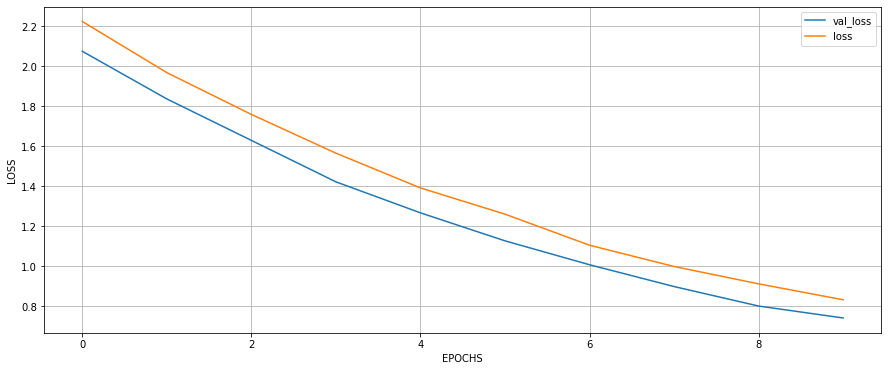

In [36]:
plot_stuff(history)

In [35]:
model.evaluate(val_ds)

8/8 [==============================] - 3s 142ms/step - loss: 0.0132 - accuracy: 1.0000


[0.013234873302280903, 1.0]

In [26]:
# TF datasets are weird, I used the second answer from https://stackoverflow.com/questions/64622210/how-to-plot-confusion-matrix-for-prefetched-dataset-in-tensorflow
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
y_true = tf.concat([item for item in y_true], axis = 0)
y_pred = tf.concat([item for item in y_pred], axis = 0)
print(y_true)
print(y_pred)

tf.Tensor([9 2 0 3 4 4 6 7 2 3 0 9 0 4 3 8 5 1 6 7 2 3 2 0 9 2 0 1 9 2 0 1], shape=(32,), dtype=int32)
tf.Tensor([9 2 0 3 4 4 6 7 2 3 0 9 0 4 3 8 5 1 6 7 2 3 2 0 9 2 0 1 9 3 0 1], shape=(32,), dtype=int64)


Confusion Matrix
              precision    recall  f1-score   support

          n0       1.00      1.00      1.00         6
          n1       1.00      1.00      1.00         3
          n2       1.00      0.83      0.91         6
          n3       0.80      1.00      0.89         4
          n4       1.00      1.00      1.00         3
          n5       1.00      1.00      1.00         1
          n6       1.00      1.00      1.00         2
          n7       1.00      1.00      1.00         2
          n8       1.00      1.00      1.00         1
          n9       1.00      1.00      1.00         4

    accuracy                           0.97        32
   macro avg       0.98      0.98      0.98        32
weighted avg       0.97      0.97      0.97        32



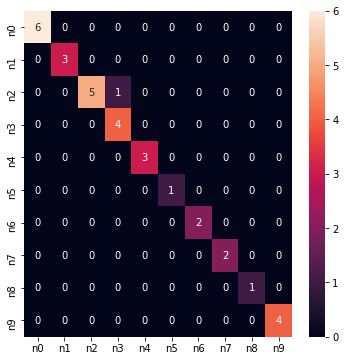

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print('Confusion Matrix')
cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (6,6))
sns.heatmap(df_cm, annot=True)
print(classification_report(y_true, y_pred, target_names = classes))

### Finetune the model and show the plots, test data confusion matrix and accuracy.

In [33]:
xception_base.trainable = True
print("Number of layers: ", len(xception_base.layers))
fine_tune_at = 100
for layer in xception_base.layers[:fine_tune_at]:
  layer.trainable =  False
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001), loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
model.summary()
len(model.trainable_variables)

Number of layers:  132
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 299, 299, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 299, 299, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 299, 299, 3)       0         
_________________________________________________________________
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 20

41

In [34]:
history_ft = model.fit(train_ds, epochs=20, initial_epoch=history.epoch[-1], validation_data=val_ds)

Epoch 10/20
35/35 [==============================] - 28s 488ms/step - loss: 0.5159 - accuracy: 0.9490 - val_loss: 0.2445 - val_accuracy: 0.9833
Epoch 11/20
35/35 [==============================] - 18s 434ms/step - loss: 0.2093 - accuracy: 0.9681 - val_loss: 0.1000 - val_accuracy: 0.9917
Epoch 12/20
35/35 [==============================] - 18s 442ms/step - loss: 0.1280 - accuracy: 0.9727 - val_loss: 0.0605 - val_accuracy: 0.9958
Epoch 13/20
35/35 [==============================] - 18s 436ms/step - loss: 0.1042 - accuracy: 0.9699 - val_loss: 0.0426 - val_accuracy: 0.9958
Epoch 14/20
35/35 [==============================] - 18s 437ms/step - loss: 0.0836 - accuracy: 0.9736 - val_loss: 0.0308 - val_accuracy: 1.0000
Epoch 15/20
35/35 [==============================] - 18s 436ms/step - loss: 0.0614 - accuracy: 0.9818 - val_loss: 0.0309 - val_accuracy: 0.9958
Epoch 16/20
35/35 [==============================] - 18s 438ms/step - loss: 0.0587 - accuracy: 0.9818 - val_loss: 0.0236 - val_accuracy:

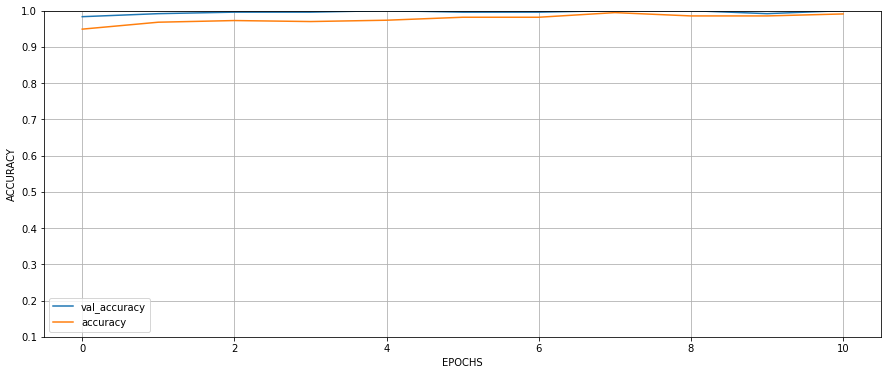

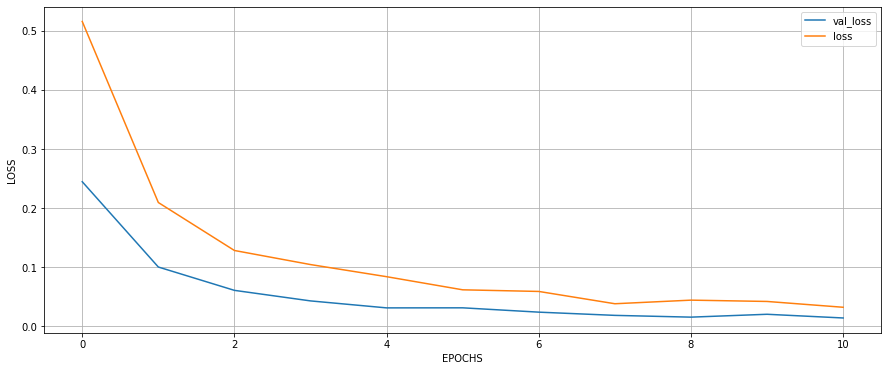

In [37]:
plot_stuff(history_ft)

In [38]:
# TF datasets are weird, I used the second answer from https://stackoverflow.com/questions/64622210/how-to-plot-confusion-matrix-for-prefetched-dataset-in-tensorflow
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
y_true = tf.concat([item for item in y_true], axis = 0)
y_pred = tf.concat([item for item in y_pred], axis = 0)
print(y_true)
print(y_pred)

tf.Tensor([3 2 1 3 3 5 2 6 4 5 2 1 0 6 5 6 8 6 8 8 3 8 9 2 1 1 1 7 0 3 2 1], shape=(32,), dtype=int32)
tf.Tensor([3 2 1 3 3 5 2 6 4 5 2 1 0 6 5 6 8 6 8 8 3 8 9 2 1 1 1 7 0 3 2 1], shape=(32,), dtype=int64)


Confusion Matrix
              precision    recall  f1-score   support

          n0       1.00      1.00      1.00         2
          n1       1.00      1.00      1.00         6
          n2       1.00      1.00      1.00         5
          n3       1.00      1.00      1.00         5
          n4       1.00      1.00      1.00         1
          n5       1.00      1.00      1.00         3
          n6       1.00      1.00      1.00         4
          n7       1.00      1.00      1.00         1
          n8       1.00      1.00      1.00         4
          n9       1.00      1.00      1.00         1

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



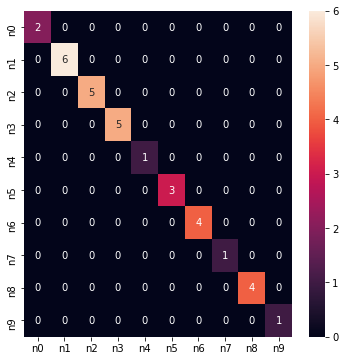

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print('Confusion Matrix')
cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in classes],
                  columns = [i for i in classes])
plt.figure(figsize = (6,6))
sns.heatmap(df_cm, annot=True)
print(classification_report(y_true, y_pred, target_names = classes))

### 9. Comment on the results. Are the results to your satisfaction? Which phase contributed to the improved performance? What was the most challenging aspect of the exercise? Ideas for improving the model?

Answer:

The results are beyond satisfactory, with a validation accuracy close to 100% and perfect scores when evaluating the final model.
It may be more interesting to test it with a different validation dataset, maybe with handpicked images, or to try and change the augmentation parameters.
Fine-tuning improved the final performance noticeably, as a previous training over 20 epochs of the "rough" model didn't manage to achieve almost 100% accuracy.
The most challenging aspect was to manage the dataset, as I opted to use TensorFlow's pipeline which I was not familiar with.
I think this model is good as-is, the only improvement could be an even bigger and more varied dataset.